import libraries 

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [289]:

import re

In [290]:
import preprocessor as p

In [291]:
!pip install tweet-preprocessor


In [292]:

from sklearn.feature_extraction.text import CountVectorizer

In [293]:
import nltk

In [294]:
ps=nltk.PorterStemmer()

importing data

In [295]:
test=pd.read_csv('/content/drive/My Drive/test.csv')

In [296]:

train=pd.read_csv('/content/drive/My Drive/train.csv')

Analysing the data


In [297]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [298]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [299]:
test.isnull().values.any()

False

CLEANING TWEET

In [300]:
train_tweet=train.append(test,ignore_index=True)
pattern = "@user[/w]*"
def remove_pattern(input_txt):
  r=re.findall('@user[/w]*',input_txt)
  for i in r:
    input_txt=re.sub(i,"",input_txt)
  return input_txt
train["clean_tweet"]=np.vectorize(remove_pattern)(train['tweet'])

In [301]:
train.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [302]:
test_tweet=test.append(test,ignore_index=True)
pattern = "@user[/w]*"
def remove_pattern(input_txt):
  r=re.findall('@user[/w]*',input_txt)
  for i in r:
    input_txt=re.sub(i,"",input_txt)
  return input_txt
test["clean_tweet"]=np.vectorize(remove_pattern)(test['tweet'])




In [303]:
test.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."


In [304]:
test

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."


In [305]:
train

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [306]:
train

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [307]:
train["clean_tweet"]=train["clean_tweet"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
train.head()
  

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [308]:
tokenized_tweet=train["clean_tweet"].apply(lambda x:x.split())
tokenized_tweet 

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, can't, cause, they, do...
2                                  [bihday, your, majesty]
3        [#model, love, take, with, time, urð±!!!, ð...
4                      [factsguide:, society, #motivation]
                               ...                        
31957    [that, youuu?ððððððððð...
31958    [nina, turner, airwaves, trying, wrap, herself...
31959            [listening, songs, monday, morning, work]
31960    [#sikh, #temple, vandalised, #calgary,, #wso, ...
31961                                      [thank, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [309]:
tokenized_tweet=tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [310]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=' '.join(tokenized_tweet[i])
train["clean_tweet"]=tokenized_tweet
train.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


In [311]:
test["clean_tweet"]=test["clean_tweet"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
test.head()
  

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone #birdsâ #...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal your #acne!! #altwaystoheal #he...
3,31966,is the hp and the cursed child book up for res...,"cursed child book reservations already? yes, w..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","#bihday amazing, hilarious #nephew ahmir! uncl..."


In [312]:
tokenized_tweet=test["clean_tweet"].apply(lambda x:x.split())
tokenized_tweet 

0        [#studiolife, #aislife, #requires, #passion, #...
1        [#white, #supremacists, want, everyone, #birds...
2        [safe, ways, heal, your, #acne!!, #altwaystohe...
3        [cursed, child, book, reservations, already?, ...
4        [#bihday, amazing,, hilarious, #nephew, ahmir!...
                               ...                        
17192    [thought, factory:, left-right, polarisation!,...
17193    [feeling, like, mermaid, ð, #hairflip, #nev...
17194    [#hillary, #campaigned, today, #ohio((omg)), &...
17195    [happy,, work, conference:, right, mindset, le...
17196    [song, glad", free, download!, #shoegaze, #new...
Name: clean_tweet, Length: 17197, dtype: object

In [313]:

tokenized_tweet=tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])
tokenized_tweet.head()

0    [#studiolif, #aislif, #requir, #passion, #dedi...
1    [#white, #supremacist, want, everyon, #birdsâ...
2    [safe, way, heal, your, #acne!!, #altwaystoh, ...
3    [curs, child, book, reserv, already?, yes,, wh...
4    [#bihday, amazing,, hilari, #nephew, ahmir!, u...
Name: clean_tweet, dtype: object

In [314]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i]=' '.join(tokenized_tweet[i])
test["clean_tweet"]=tokenized_tweet
test.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacist want everyon #birdsâ #mo...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal your #acne!! #altwaystoh #health...
3,31966,is the hp and the cursed child book up for res...,"curs child book reserv already? yes, where? wh..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","#bihday amazing, hilari #nephew ahmir! uncl da..."


VECTORIZING DATA

impact of hashtags

In [315]:
def hashtag(x):
  hashtags=[]
  for i in x:
    hash=re.findall(r"#(\w+)",i)
    hashtags.append(hash)
  return hashtags

In [316]:
hash_ng=hashtag(train["clean_tweet"][train["label"]==1])
hash_pg=hashtag(train["clean_tweet"][train["label"]==0])

In [317]:
ht_pg=sum(hash_pg,[])
ht_ng=sum(hash_ng,[])

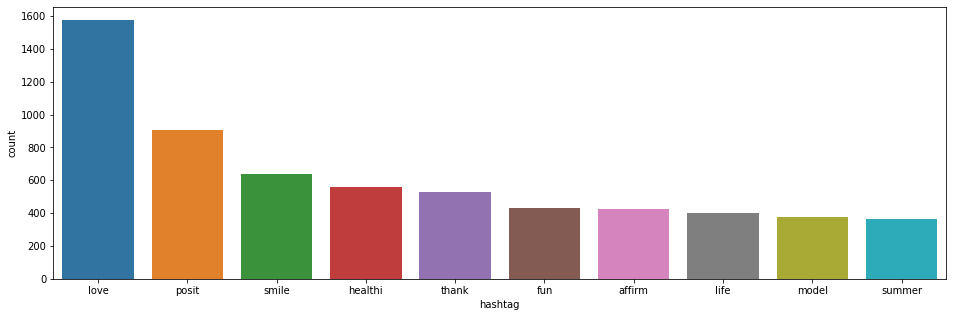

In [318]:
a=nltk.FreqDist(ht_pg)
d=pd.DataFrame({'hashtag':list(a.keys()), "count":list(a.values())})
#most used hashtag
d=d.nlargest(columns='count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x="hashtag",y="count")
ax.set(ylabel="count")
plt.show()

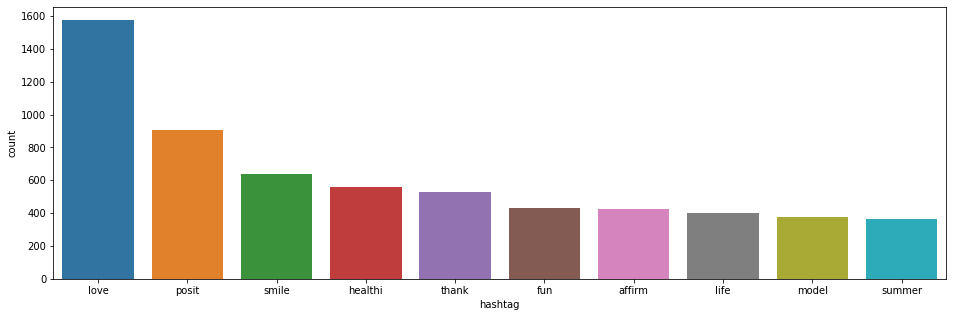

In [319]:
b=nltk.FreqDist(ht_ng)
c=pd.DataFrame({'hashtag':list(b.keys()), "count":list(b.values())})
#most used hashtag
e=d.nlargest(columns='count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x="hashtag",y="count")
ax.set(ylabel="count")
plt.show()

vectorizing data

In [320]:
train["clean_tweet"]=np.vectorize(remove_pattern)(train["tweet"])

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [322]:
def clean_txt(txt):
  txt=" ".join([w for w in txt.split() if len(w)>3 ])
  tokens=txt.split()
  txt=[ps.stem(word) for  word in tokens]
  return txt

In [323]:
train["clean_tweet"]=train["clean_tweet"].apply(lambda x: ' '.join(clean_txt(x)))

In [324]:
x=train.drop("label",axis=1)
x=train.drop("id",axis=1)

In [325]:
y=train["label"]

In [326]:
x_train,x_test,y_train,y_test=train_test_split(x ,y, test_size=0.3)

In [327]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(max_df = 0.9 ,min_df =2, max_features =1000 ,stop_words="english")
tfidf_vect_fit=tfidf_vect.fit(x_train["clean_tweet"])
tfidf_train=tfidf_vect_fit.transform(x_train["clean_tweet"])
tfidf_test=tfidf_vect_fit.transform(x_test['clean_tweet'])
x_feature_train=pd.DataFrame(tfidf_train.toarray())
x_feature_test=pd.DataFrame(tfidf_test.toarray())

In [328]:
x_feature_train.shape,y_train.shape

((22373, 1000), (22373,))

modeling

In [329]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [330]:
clf=RandomForestClassifier()

In [331]:
clf.fit(x_feature_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [332]:
model_score=clf.score(x_feature_test,y_test)

In [333]:
model_score

0.9209510897903849

Test the model

In [334]:
pred= clf.predict_proba(x_feature_test)
pred=pred[:,1]>0.3
pred=pred.astype(np.int)

In [335]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

In [336]:
score=accuracy_score(y_test,pred)

In [337]:
score*100

90.73938888309522

In [338]:
pred_df=pd.DataFrame(y_test)
pred_df['Randomforest']=pred.astype(np.int)
pred_df.head()

,label,Randomforest
27498,0,0
30239,0,0
8240,0,0
5913,0,0
24982,0,0


In [339]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8913
           1       0.04      0.01      0.02       676

    accuracy                           0.91      9589
   macro avg       0.48      0.49      0.48      9589
weighted avg       0.87      0.91      0.89      9589



confusion matrix

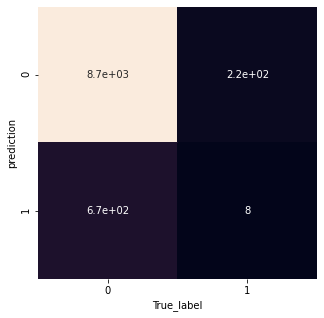

In [340]:
def plot_conf(y_test,y_preds):
  fig,ax =plt.subplots(figsize=(5,5))
  ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                 annot=True,
                 cbar=False)
  plt.xlabel("True_label")
  plt.ylabel("prediction")
plot_conf(y_test,pred)

Plotting Roc curve

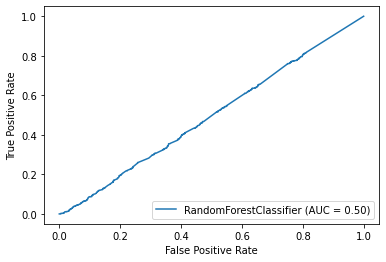

In [341]:
def plot_roc(model,x_feature_test,y_test):
  plot_roc_curve(model,x_feature_test,y_test)
plot_roc(clf,x_feature_test,y_test)

In [342]:
pred.shape

(9589,)

In [343]:
y_test.shape

(9589,)

Visualizaton of tweet

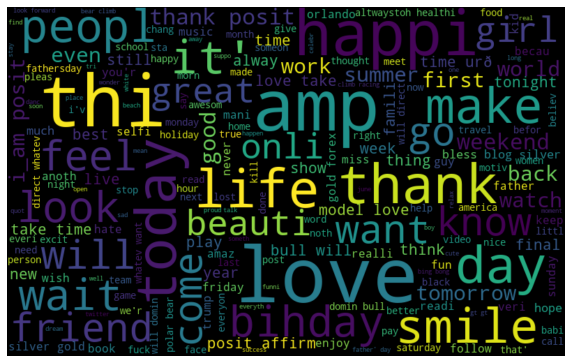

In [344]:
all_words=' '.join([text for text in train['clean_tweet']])
from wordcloud import WordCloud
worldcloud = WordCloud(width = 800 , height= 500 , random_state=21 ,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,10))
plt.imshow(worldcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

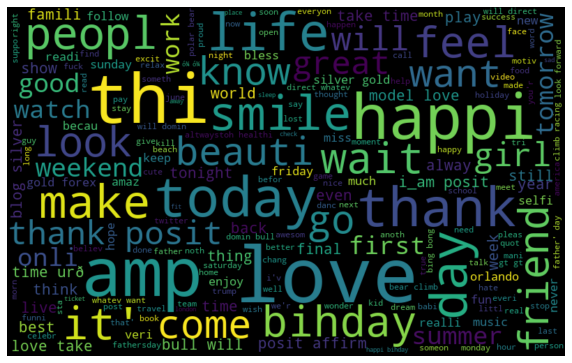

In [345]:
#words that are positive tweets
all_words=' '.join([text for text in train['clean_tweet'][train['label']==0]])
from wordcloud import WordCloud
worldcloud = WordCloud(width = 800 , height= 500 , random_state=21 ,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,10))
plt.imshow(worldcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


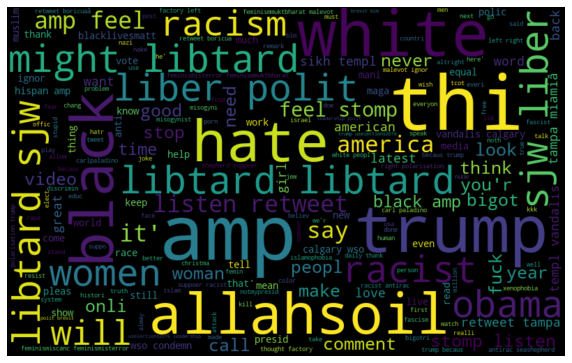

In [346]:
#words that are negative tweet
all_words=' '.join([text for text in train['clean_tweet'][train['label']==1]])
from wordcloud import WordCloud
worldcloud = WordCloud(width = 800 , height= 500 , random_state=21 ,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,10))
plt.imshow(worldcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Testing model on test data

In [347]:
test['clean_tweet']=np.vectorize(remove_pattern)(test['tweet'])

In [348]:
test['clean_tweet']=train['clean_tweet'].apply(lambda x:" ".join(clean_txt(x)))


In [349]:
test=test.drop("id",axis=1)


In [350]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(max_df = 0.9 ,min_df =2, max_features =1000 ,stop_words="english")
tfidf_vect_fit=tfidf_vect.fit(test["clean_tweet"])
tfidf_train=tfidf_vect_fit.transform(test["clean_tweet"])
test_f=pd.DataFrame(tfidf_test.toarray())

In [351]:
test_f.shape

(9589, 1000)

In [352]:
test_pred=clf.predict(test_f)

In [353]:
test['label']=pd.DataFrame(test_pred,columns=['label'])

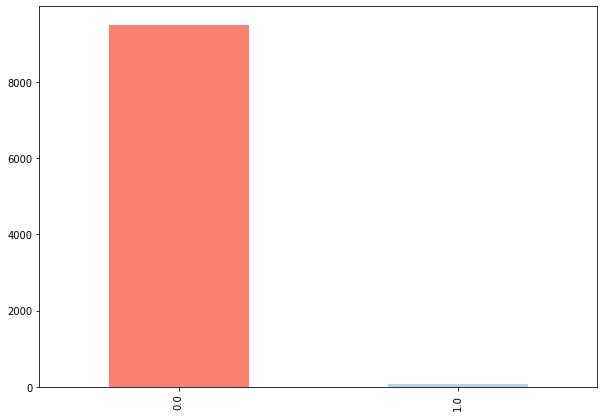

In [354]:
test['label'].value_counts().plot(kind='bar',color=['salmon','lightblue'],figsize=(10,7))